# Experiments on hyperparameters

In [ ]:
import sys
import os

# Add the absolute path to 'src' folder
sys.path.append(os.path.abspath("src"))

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from typing import List
from layer import Layer
from linear import Linear
from activations import ActivationReLU, ActivationSigmoid
from sequential import Sequential
from utils import mean_squared_error, InformantStrategy
from data import load_data
from pso import ParticleSwarmOptimisation, AccelerationCoefficients

/home/arne/Concrete_ANN_PSO/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Final particle fitness: 0.007554099813605533
Final particle position sample: [-0.01942744  0.00265473  0.00717573 -0.03428943 -0.12916533]


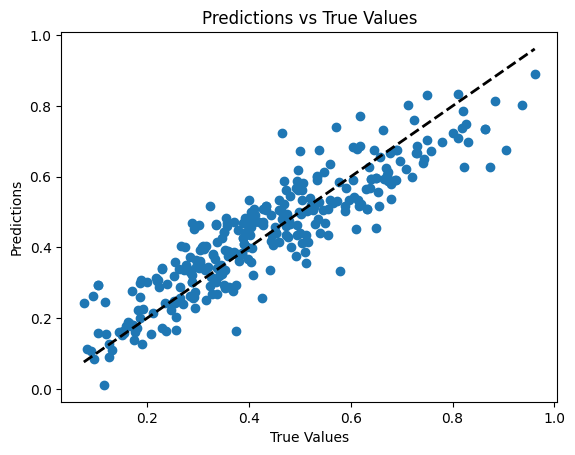

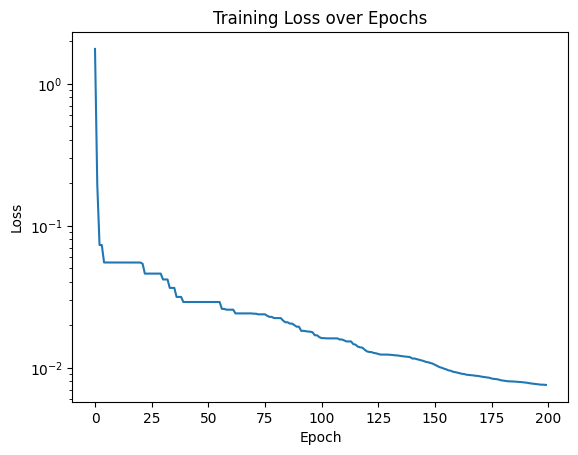

Test Accuracy: 84.61%
Train Accuracy: 84.44%
Final particle fitness: 0.015395575189381427
Final particle position sample: [-0.01907593 -0.10753892 -0.04718651 -0.0224266   0.00623164]


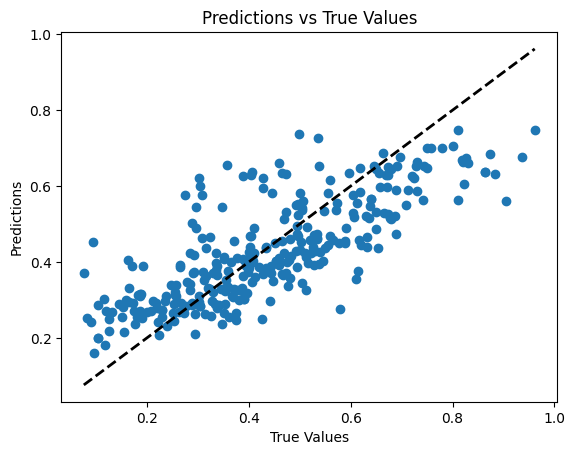

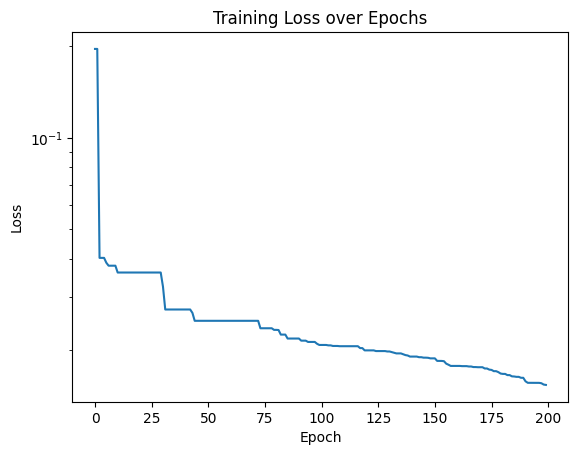

Test Accuracy: 78.58%
Train Accuracy: 77.27%
Final particle fitness: 0.014705387079553033
Final particle position sample: [ 0.01570538  0.07126631 -0.07444533 -0.01341251 -0.05158871]


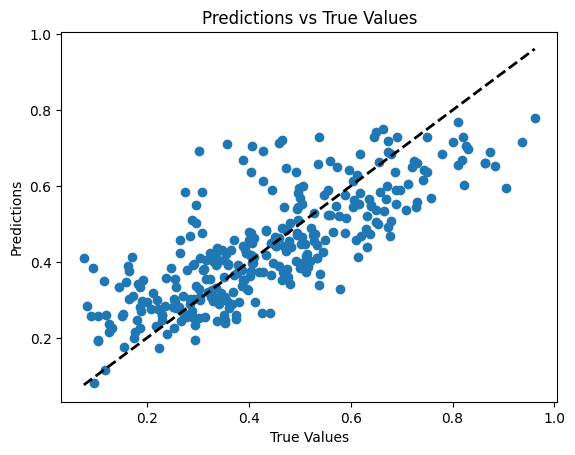

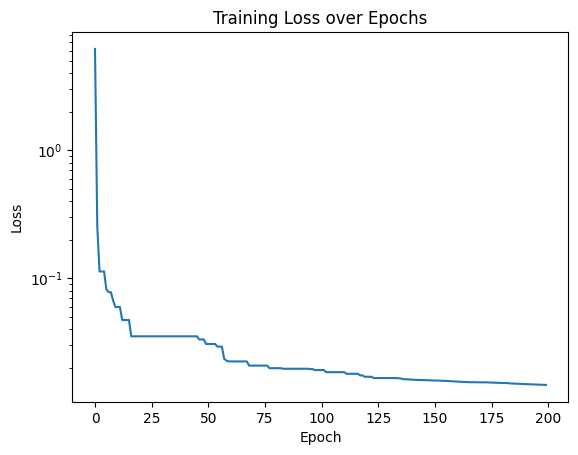

Test Accuracy: 78.85%
Train Accuracy: 78.16%
Final particle fitness: 0.008582839734522387
Final particle position sample: [ 0.05735272 -0.00550746  0.00966501  0.00731164 -0.02430108]


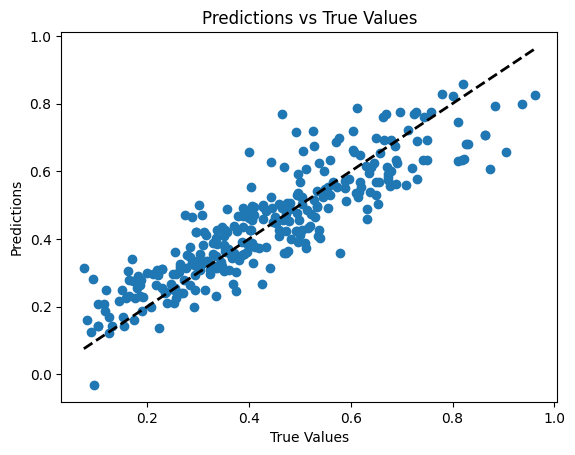

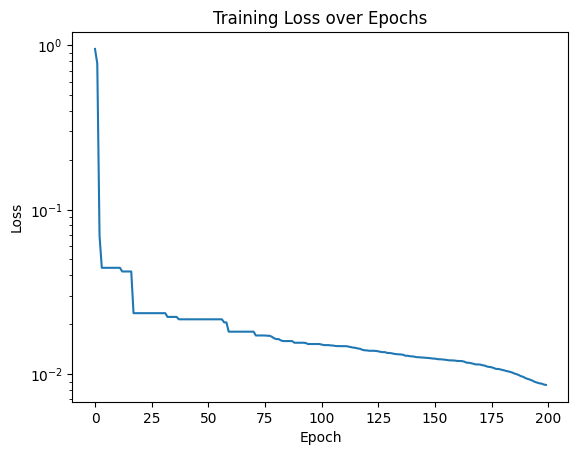

Test Accuracy: 84.27%
Train Accuracy: 83.35%
Final particle fitness: 0.010242905103381566
Final particle position sample: [ 0.0245845   0.02379628 -0.05282352  0.036466    0.00804477]


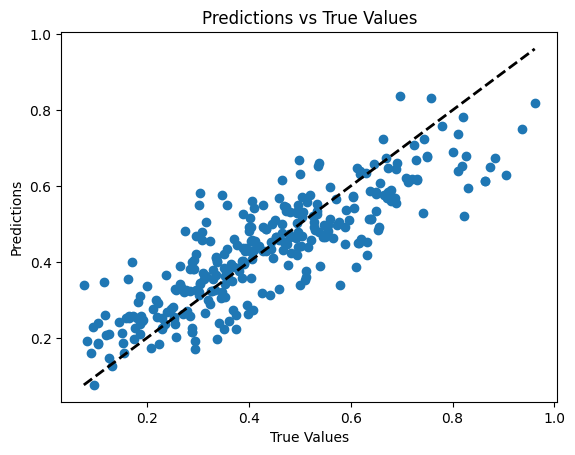

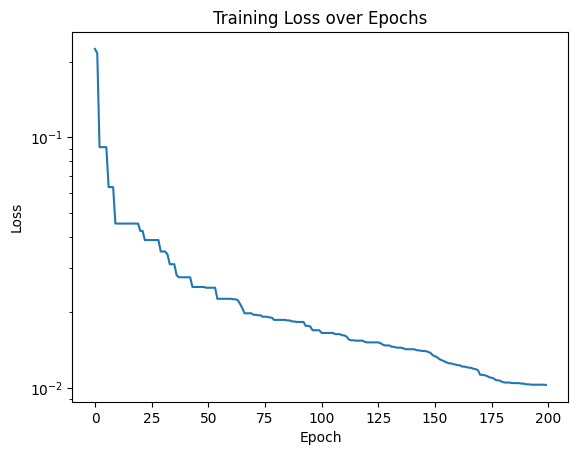

Test Accuracy: 82.09%
Train Accuracy: 81.78%
Final particle fitness: 0.011822012806242066
Final particle position sample: [-0.02818332 -0.08715576  0.0189033   0.00448555  0.00577398]


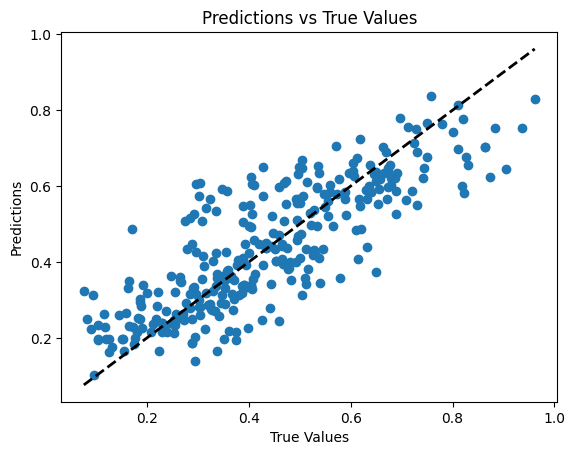

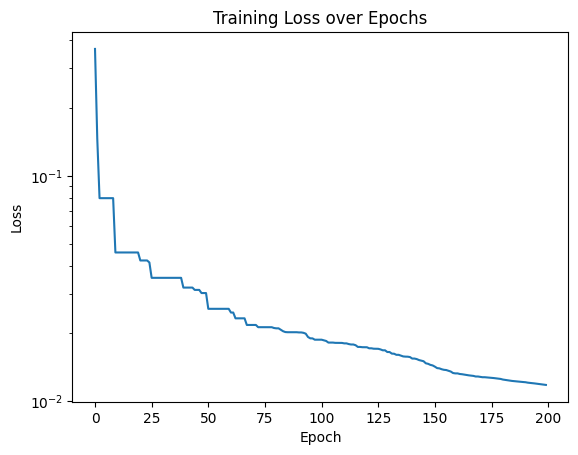

Test Accuracy: 80.77%
Train Accuracy: 80.87%
Final particle fitness: 0.009616288438292764
Final particle position sample: [-0.02476083  0.01866871 -0.00544362 -0.03245907 -0.03558889]


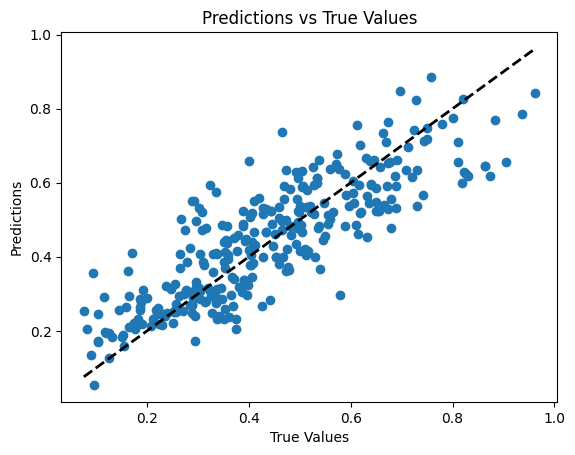

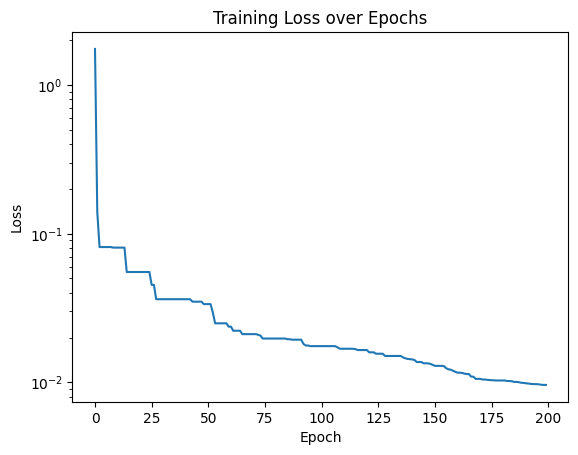

Test Accuracy: 81.67%
Train Accuracy: 82.45%
Final particle fitness: 0.008195866473013284
Final particle position sample: [ 0.23437521 -0.08582807  0.07799096  0.0674438   0.0187337 ]


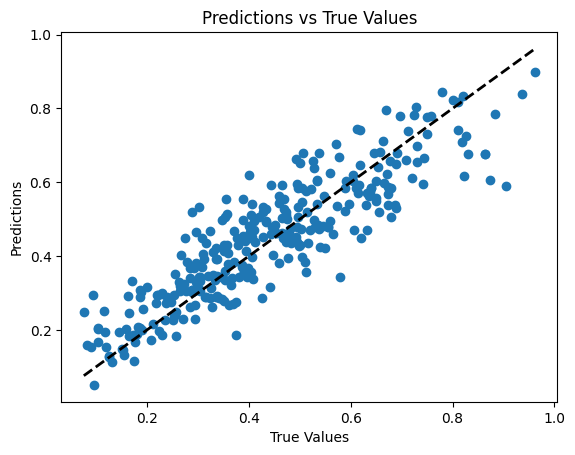

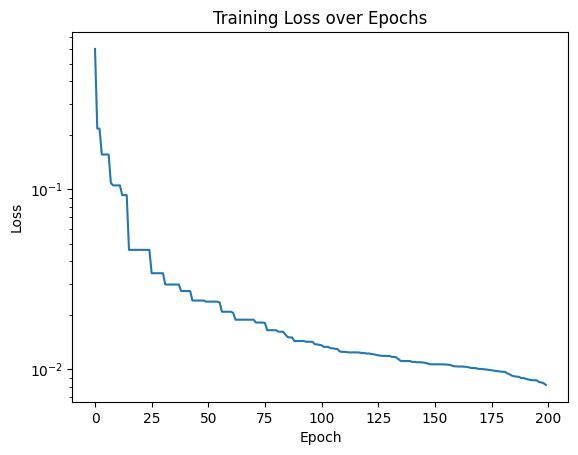

Test Accuracy: 83.97%
Train Accuracy: 83.53%
Final particle fitness: 0.011994814808221439
Final particle position sample: [ 0.03629424  0.01144031 -0.01225092 -0.02131669  0.04069144]


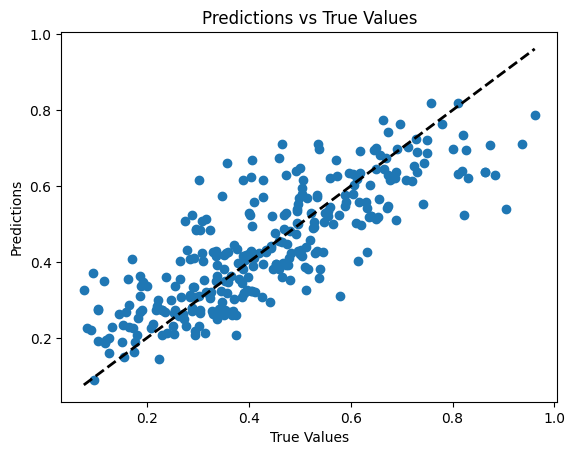

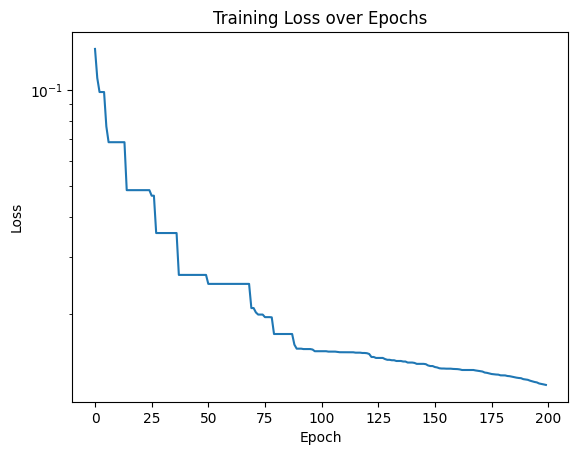

Test Accuracy: 80.87%
Train Accuracy: 80.54%
Final particle fitness: 0.011983921749354504
Final particle position sample: [ 0.06617198  0.02064601  0.05173237 -0.02628261  0.02096578]


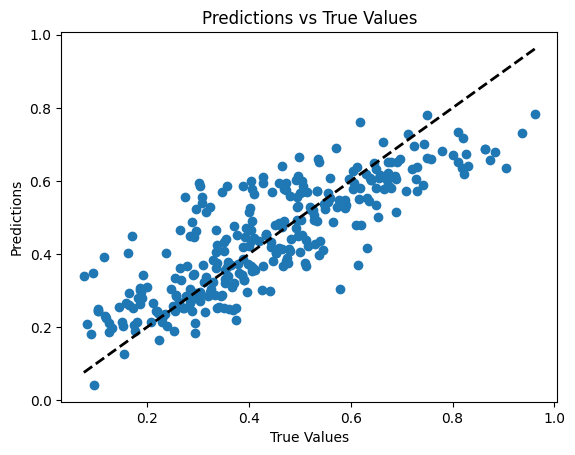

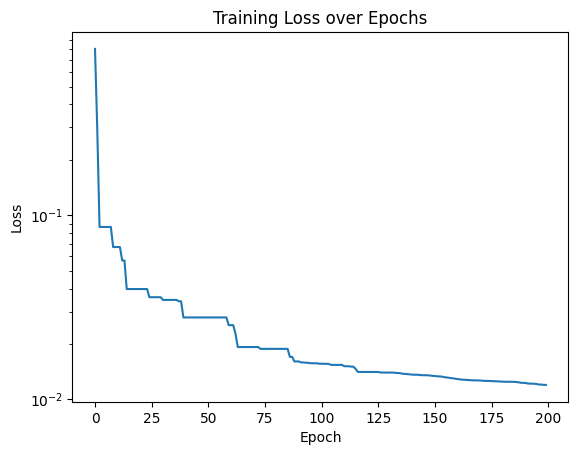

Test Accuracy: 81.06%
Train Accuracy: 80.44%
Final particle fitness: 0.008082573035525488
Final particle position sample: [-0.0690348   0.00961389  0.00749982  0.04426166  0.33955105]


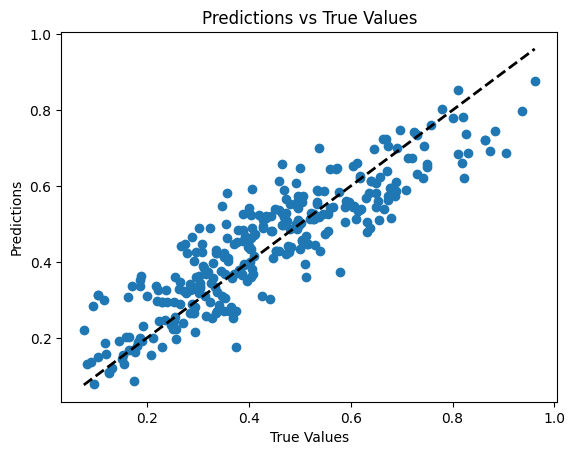

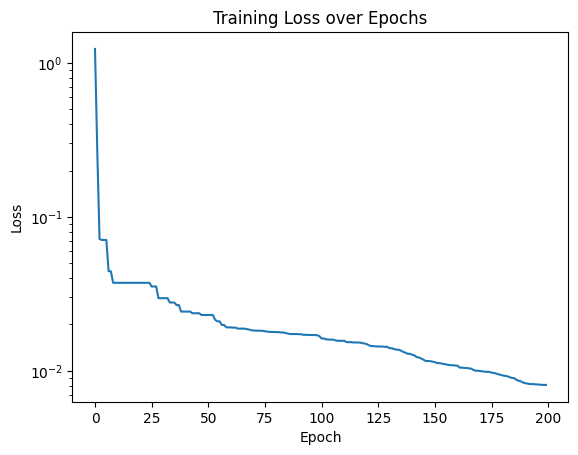

Test Accuracy: 84.37%
Train Accuracy: 84.04%
Final particle fitness: 0.010146224193683044
Final particle position sample: [-0.03167702  0.02697297 -0.01596311  0.06903194  0.00463235]


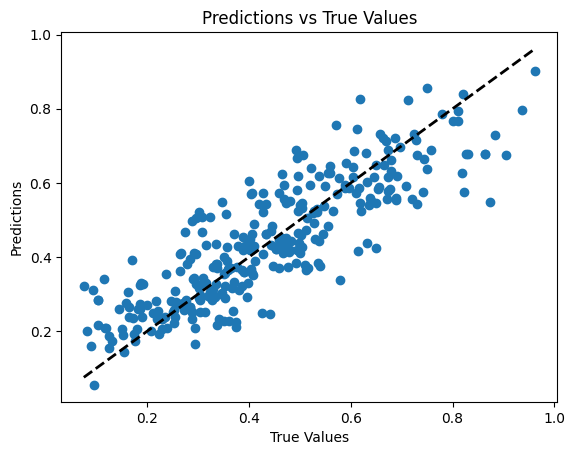

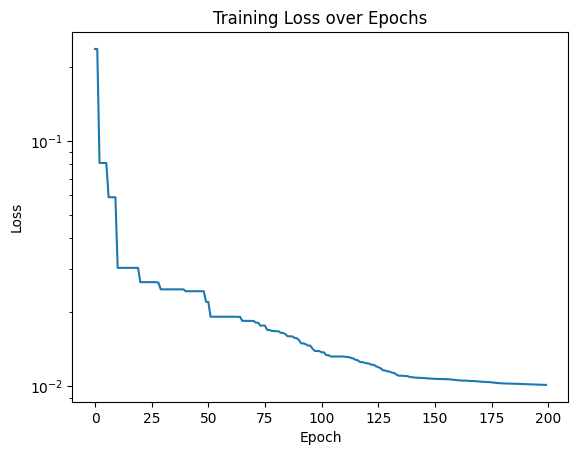

Test Accuracy: 82.62%
Train Accuracy: 82.05%
Final particle fitness: 0.008062825811138239
Final particle position sample: [-0.02159971  0.01027671  0.05849269  0.05084214  0.05641147]


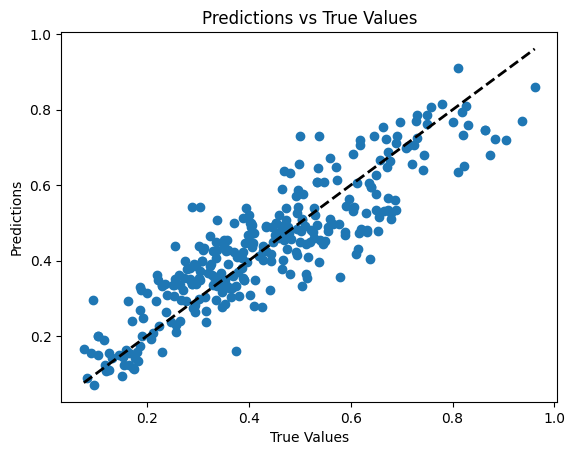

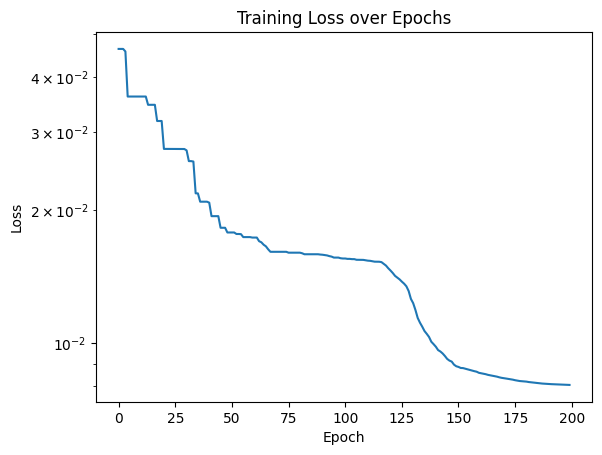

Test Accuracy: 83.85%
Train Accuracy: 83.69%
Final particle fitness: 0.015527441958379675
Final particle position sample: [-0.02345468 -0.04025488 -0.00262269  0.03179187  0.00488047]


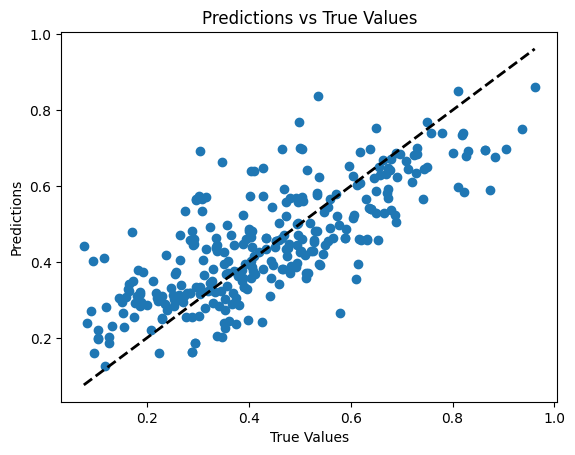

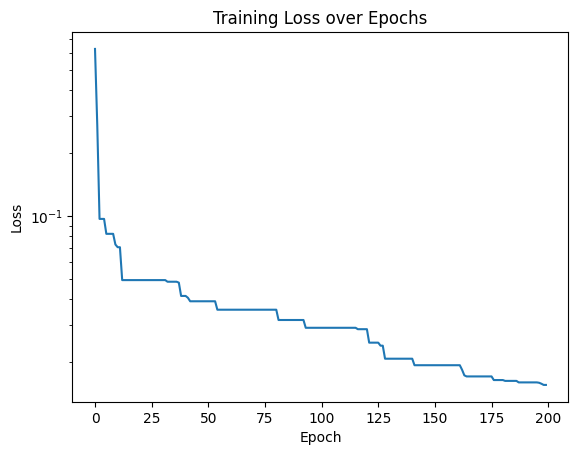

Test Accuracy: 77.90%
Train Accuracy: 77.33%
Final particle fitness: 0.007442798935003776
Final particle position sample: [ 0.04939818  0.03287498  0.0560444  -0.01562833 -0.00094932]


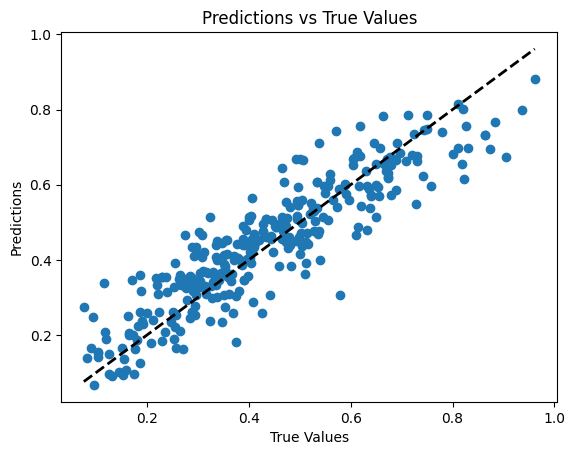

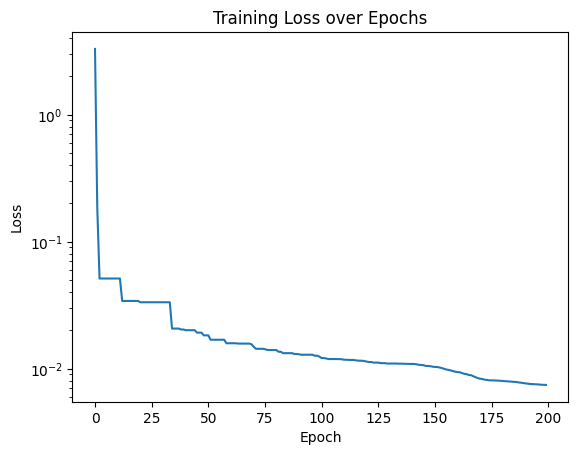

Test Accuracy: 85.14%
Train Accuracy: 84.31%
Final particle fitness: 0.011778279719851684
Final particle position sample: [-0.00529279 -0.02629106 -0.10872578  0.01107687  0.0678204 ]


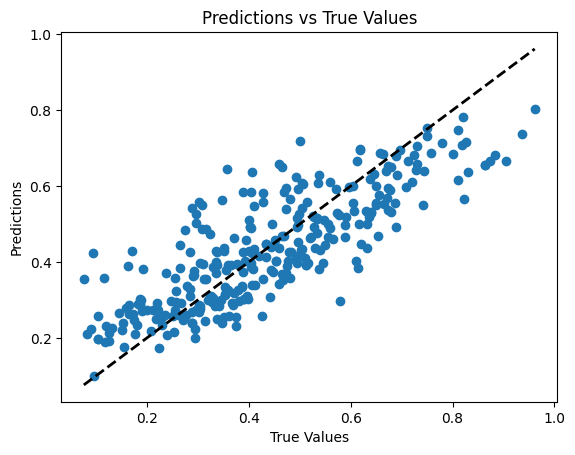

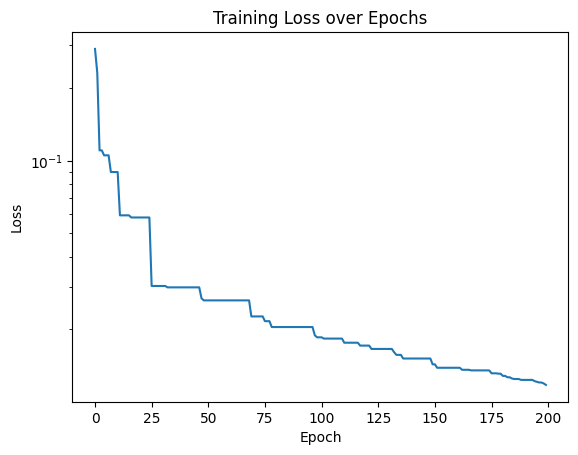

Test Accuracy: 80.25%
Train Accuracy: 80.35%
Final particle fitness: 0.018098791351746253
Final particle position sample: [ 0.03059429 -0.03562146 -0.00711564  0.05323852 -0.00326543]


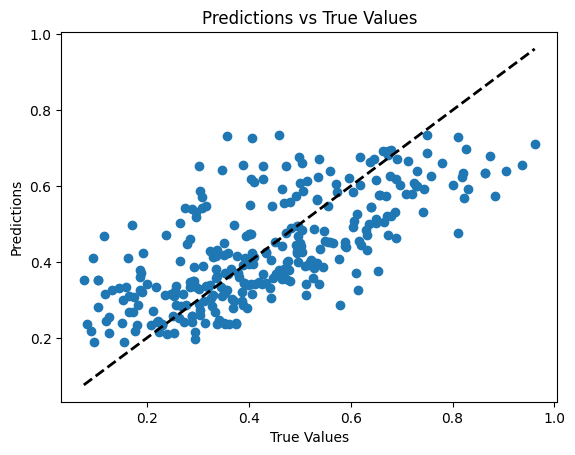

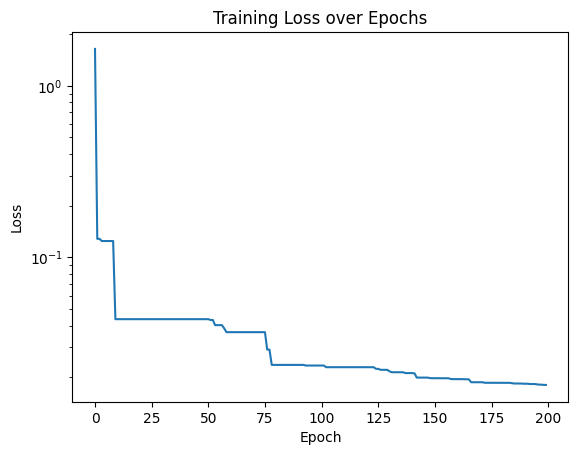

Test Accuracy: 75.17%
Train Accuracy: 75.17%
Final particle fitness: 0.010690891673818176
Final particle position sample: [-8.44839357e-05 -9.90117883e-02 -2.99249896e-02  5.59396610e-02
 -2.55045544e-02]


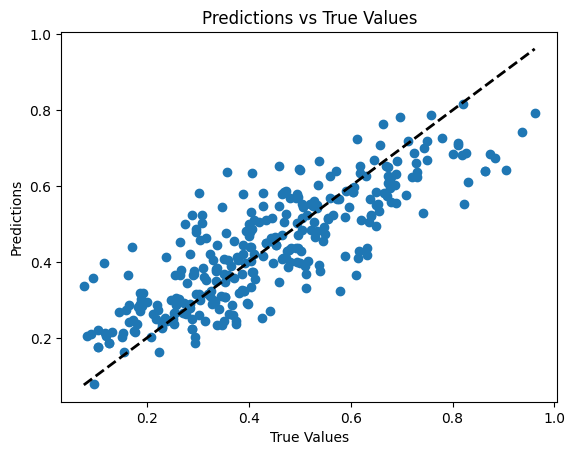

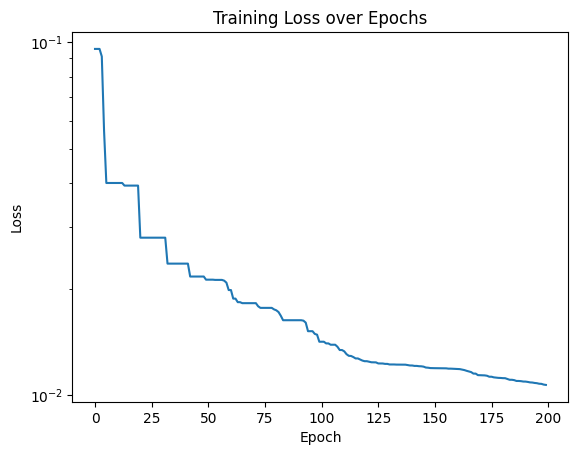

Test Accuracy: 81.17%
Train Accuracy: 81.60%
Final particle fitness: 0.007122412223760709
Final particle position sample: [-0.00973265 -0.04344017 -0.01798037 -0.03801002 -0.06315243]


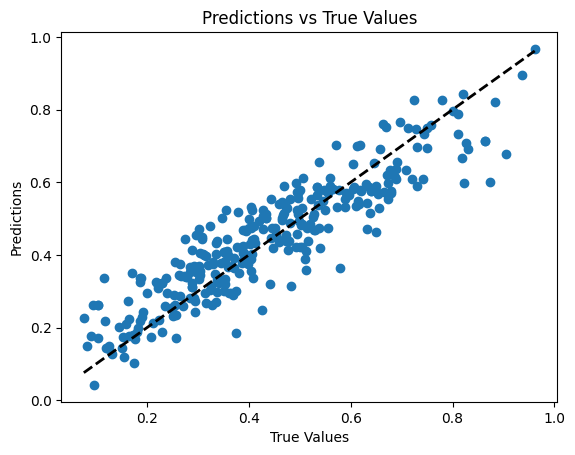

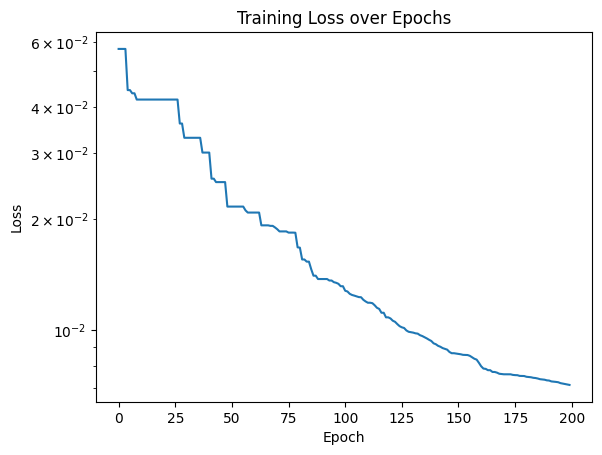

Test Accuracy: 85.23%
Train Accuracy: 84.67%
Final particle fitness: 0.00868788813971701
Final particle position sample: [-0.01439581 -0.03903265 -0.0287063   0.03056607  0.09053681]


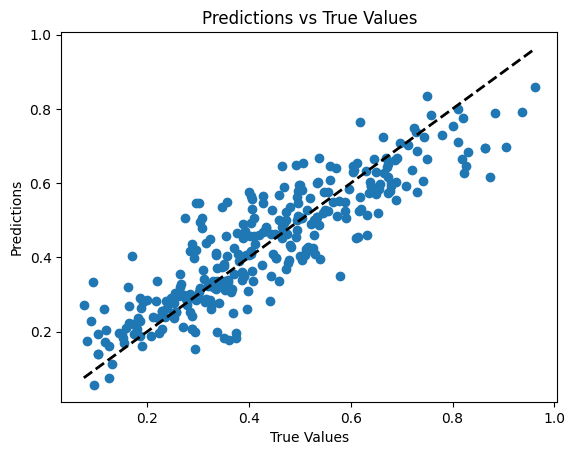

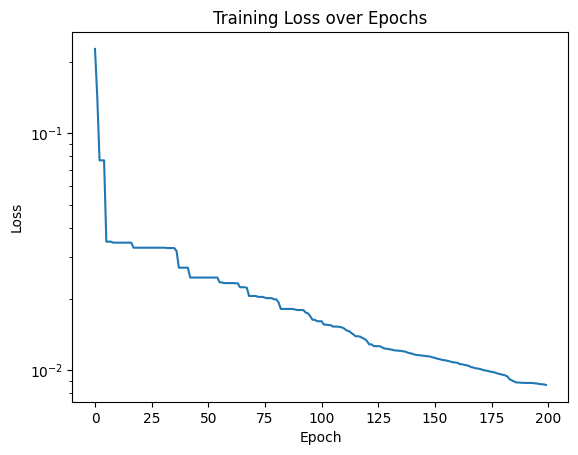

Test Accuracy: 84.15%
Train Accuracy: 83.36%

===== Summary over 20 runs =====
Average loss: 0.0108
Average train accuracy: 81.47%
Average test accuracy:  81.83%
Train accuracy std: 2.65
Test accuracy std:  2.67


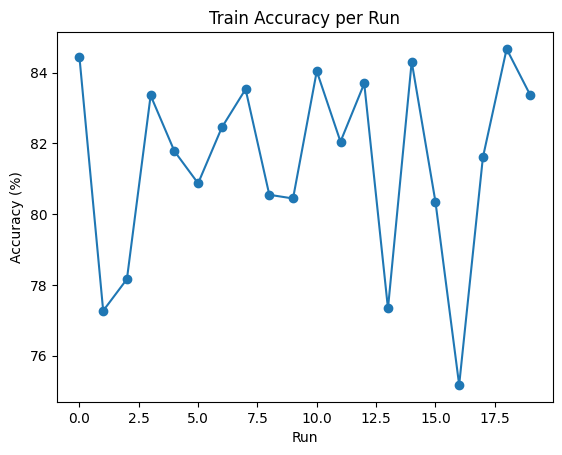

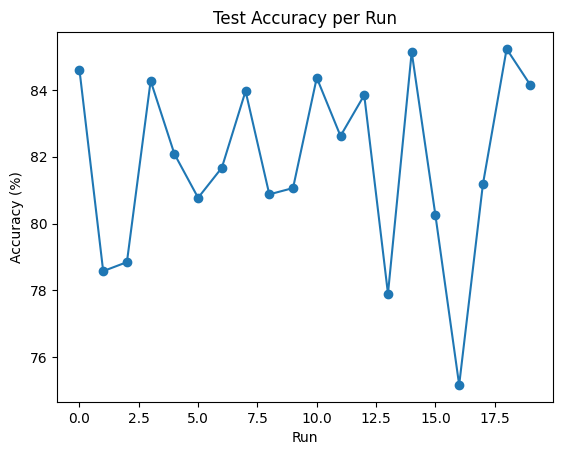

In [ ]:
(train_features, train_targets), (test_features, test_targets) = load_data(
        "./data/concrete_data.csv"
    )

from datetime import datetime
import os

# Timestamp for the entire experiment
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

size = [37, 27]
iter = 20
epochs = 200

# Main output directory
main_dir = f"./results/ga_test/{timestamp}_{size[0]}_{size[1]}_{iter}iter_{epochs}epoch"
os.makedirs(main_dir, exist_ok=True)

all_final_train_accuracies = []
all_final_test_accuracies = []
all_final_losses = []

for run_id in range(1, iter + 1):

    mlp = Sequential(
        Linear(size_input=train_features.shape[1], size_hidden=size[0]),
        ActivationReLU(),
        Linear(size_input=size[0], size_hidden=size[1]),
        ActivationReLU(),
        Linear(size_input=size[1], size_hidden=1),
        )

    # swarm_size = 45
    # epochs = epochs
    # accel_coeff = AccelerationCoefficients(
    #     inertia_weight=0.708,
    #     cognitive_weight=1.898,
    #     social_weight=0.351,
    #     global_best_weight=0.684,
    #     jump_size=0.851,
    #     max_velocity=0.9,
    #     max_position=3.87,
    # )
    # num_informants = 4
    # particle_initial_position_scale = (0.0001, 0.05)
    # loss_function = mean_squared_error
    # informants_strategy = InformantStrategy.KNEAREST

    swarm_size = 48
    epochs = epochs
    accel_coeff = AccelerationCoefficients(
        inertia_weight=0.708,
        cognitive_weight=1.906,
        social_weight=0.288,
        global_best_weight=1.3,
        jump_size=0.760,
        max_velocity=0.9,
        max_position=3.87,
    )
    num_informants = 6
    particle_initial_position_scale = (0.036145, 0.0893)
    loss_function = mean_squared_error
    informants_strategy = InformantStrategy.KNEAREST

    pso = ParticleSwarmOptimisation(
        X=train_features.T,
        Y=train_targets,
        swarm_size=swarm_size,
        accel_coeff=accel_coeff,
        num_informants=num_informants,
        informants_strategy=informants_strategy,
        loss_function=loss_function,
        particle_initial_position_scale=particle_initial_position_scale,
        model=mlp,
    )

    (final_position, final_score, losses) = pso.train(epochs)
    print(f"Final particle fitness: {final_score}")
    print(f"Final particle position sample: {final_position[:5]}")
    mlp.from_vector(final_position)
    predictions = mlp.forward(test_features.T)

    dir = f"{main_dir}/predictions_vs_true_values"
    os.makedirs(dir, exist_ok=True)

    plt.scatter(test_targets, predictions)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Predictions vs True Values")
    plt.plot(
        [test_targets.min(), test_targets.max()],
        [test_targets.min(), test_targets.max()],
        "k--",
        lw=2,
    )
    plt.savefig(f"{main_dir}/predictions_vs_true_values/{run_id}.png")
    plt.show()

    dir = f"{main_dir}/training_loss_over_epochs"
    os.makedirs(dir, exist_ok=True)

    plt.plot(losses)
    plt.yscale("log")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs")
    plt.savefig(f"{main_dir}/training_loss_over_epochs/{run_id}.png")
    plt.show()

    # Accuracy
    test_accuracy = pso.get_accuracy(test_features.T, test_targets)
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    all_final_test_accuracies.append(test_accuracy)

    train_accuracy = pso.get_accuracy(train_features.T, train_targets)
    print(f"Train Accuracy: {train_accuracy:.2f}%")

    all_final_train_accuracies.append(train_accuracy)

    all_final_losses.append(final_score)


    # print(f"""
    # Params:
    # model: MLP with layers {[type(layer).__name__ for layer in mlp.layers]}
    # swarm_size: {swarm_size}
    # epochs: {epochs}
    # accel_coeff: {accel_coeff}
    # num_informants: {num_informants}
    # loss_function: {loss_function.__name__}
    # """)

avg_loss = np.mean(all_final_losses)
avg_train_acc = np.mean(all_final_train_accuracies)
avg_test_acc = np.mean(all_final_test_accuracies)

std_train_acc = np.std(all_final_train_accuracies)
std_test_acc = np.std(all_final_test_accuracies)

print(f"\n===== Summary over {iter} runs =====")
print(f"Average loss: {avg_loss:.4f}")
print(f"Average train accuracy: {avg_train_acc:.2f}%")
print(f"Average test accuracy:  {avg_test_acc:.2f}%")
print(f"Train accuracy std: {std_train_acc:.2f}")
print(f"Test accuracy std:  {std_test_acc:.2f}")

# plt.figure()
# plt.plot(all_final_losses, marker="o")
# plt.title("Final Loss per Run")
# plt.xlabel("Run")
# plt.ylabel("Loss")
# plt.show()

plt.figure()
plt.plot(all_final_train_accuracies, marker="o")
plt.title("Train Accuracy per Run")
plt.xlabel("Run")
plt.ylabel("Accuracy (%)")
plt.savefig(f"{main_dir}/final_train_accuracies.png")
plt.show()

plt.figure()
plt.plot(all_final_test_accuracies, marker="o")
plt.title("Test Accuracy per Run")
plt.xlabel("Run")
plt.ylabel("Accuracy (%)")
plt.savefig(f"{main_dir}/final_test_accuracies.png")
plt.show()

summary_path = f"{main_dir}/experiment_summary.txt"
with open(summary_path, "w") as f:

    f.write("===== GLOBAL EXPERIMENT SUMMARY =====\n\n")

    f.write("=== ANN Structure ===\n")
    f.write("Topology: 8-4-1 with ReLU activations\n\n")

    f.write("=== PSO Hyperparameters ===\n")
    f.write(f"Swarm size: {swarm_size}\n")
    f.write(f"Epochs: {epochs}\n")
    f.write(f"Inertia: {accel_coeff.inertia_weight}\n")
    f.write(f"Cognitive: {accel_coeff.cognitive_weight}\n")
    f.write(f"Social: {accel_coeff.social_weight}\n")
    f.write(f"Global best weight: {accel_coeff.global_best_weight}\n")
    f.write(f"Jump size: {accel_coeff.jump_size}\n")
    f.write(f"Max velocity: {accel_coeff.max_velocity}\n")
    f.write(f"Max position: {accel_coeff.max_position}\n")
    f.write(f"Informants: {num_informants}\n")
    f.write(f"Initial position scale: {particle_initial_position_scale}\n\n")

    f.write(f"=== RESULTS OVER {iter} RUNS ===\n")
    for i in range(iter):
        f.write(f"Run {i+1}: Loss = {all_final_losses[i]:.5f}, "
                f"Train Acc = {all_final_train_accuracies[i]:.2f}%, "
                f"Test Acc = {all_final_test_accuracies[i]:.2f}%\n")
        
    f.write("\n=== Averages ===\n")
    f.write(f"Average Loss: {np.mean(all_final_losses):.6f}\n")
    f.write(f"Average Train Accuracy: {np.mean(all_final_train_accuracies):.2f}%\n")
    f.write(f"Average Test Accuracy: {np.mean(all_final_test_accuracies):.2f}%\n\n")

    f.write("=== Standard Deviations ===\n")
    f.write(f"Std Train Acc: {np.std(all_final_train_accuracies):.2f}\n")
    f.write(f"Std Test Acc: {np.std(all_final_test_accuracies):.2f}\n")